In [1]:
import sys

sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, DiamondNorm, Kron_Choi
from utils_qiskit import results2dict, save_results
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from QuantumTomography import RandomUnitary

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [3]:
backend = provider.get_backend('ibm_nairobi')
simulator = Aer.get_backend('aer_simulator')
job_manager = IBMQJobManager()


In [4]:
# 0-1-2
#   3
# 4-5-6

parall_qubits_all = [   [(1,3)],
                    [(3,5)],
                    [(0,3)],
                    [(2,3)],
                    [(3,4)],
                    [(3,6)],
                    ] 

In [5]:
# ibm_perth
job_ids = [
    ['c10eb902783d4342ac4fbc41742b0b85-1663802231437376',
    '3c8b6af2bab64fdd907a9cfb9b043023-16638022349227884',
    '5fe91ab3fbde4b4e91f8955eafe408d7-16638022388461673',
    '7589521511ac4fc4830f9feb2513a003-16638022426570373',
    'b848107fc91b498280b3627f27b92905-16638022462147093',
    'ea697423fcad4bfe8692d72b99f4f31e-16638022500467658'],
    ['2f1dde70ee454f6a9f3f9d446aa1c07a-16638022538207848',
    'a76e4a3472ed4827af0302ee984e0cb8-166380225734584',
    'bfc007aac0b2446c872bd2dae81bc87d-16638022609695928',
    'f295327610644e26b23509e8587a13a5-16638022646099842',
    'ba4c31f42b8b447eb6d6630d464a1ae8-16638022684624174',
    '8ac1f55094ae437dbc6cec5251d866f9-16638022724024894'],
    ['c9c4b1ed2e5647099878745299f68338-16638022764354973',
    '56110c16d5884800a6ebd79508d1b284-16638022802469387',
    '77c15599e6ee48a484216ca7eff28870-16638022836758497',
    '6cef25061a124fbf8a420f712d13e651-16638022875493615',
    '42f19a09cf2f46aa916c934ece1ecfcd-16638022913829644',
    'fbeeeb124968472e8b29f112dd44c3a9-16638022951443954'],
    ['de57b17bef3f492e804adbb8eff05c40-16638022983345613',
    'fc3ab53e5a6643628f29384c256cad3b-1663802302040549',
    '217fab595e9d42d8b51db7ee27ace675-16638023057646246',
    '57472a4b13b2439b8fcd65b584f3ed9f-16638023096108675',
    'c9beb7ab2c244bd5bdd4e3f3d7f5c313-16638023129848697',
    '0d00308233fb41d4bf7f3f0f7fbf0dbc-16638023167180457'],
    ['161b50a598b54f34b043a55382ad3522-16638023199155586',
    '656f71f5b22349f8942b422665c2670d-16638023236872547',
    '2c1c9fe4df2c4861b1e3c52a1e806b1d-166380232744101',
    '3f80a9e4e3ad46c78d5008e00e6c7503-16638023306367805',
    '8ed8421fc5fb43cb867671e855fe1f8e-16638023345802271',
    'c4edb2d1db814a3cb608a7658b8527bb-16638023378036091'],
    ]

In [7]:
results_tomo_mc = []

for job_id in job_ids:

    results_tomo = []

    for j in range(len(job_id)) :                                                  
        qndmt = device_process_measurement_tomography( backend, parall_qubits=[parall_qubits_all[j]] )
        circuits_qndmt = qndmt.circuits()                                         
    
        job = job_manager.retrieve_job_set( job_id[j], provider )                  
        results = job.results().combine_results()                                 
        save_results( results, name = job_id[j], folder = 'data_correlations')     
        results_tomo_temp = qndmt.fit( results, paralell=True, gate_set=True, Func=2 )
        np.save( 'data_correlations/results_tomography_v2_'+job_id[j], np.array(results_tomo_temp, dtype=object) )
        results_tomo.append( results_tomo_temp )  

    results_tomo_mc.append( results_tomo )   

In [ ]:
np.save( 'data_correlations/results_tomography_v2', np.array(results_tomo_mc, dtype=object) )

In [ ]:
results_tomo_mc = np.load('data_correlations/results_tomography_v2.npy', allow_pickle=True )

In [ ]:
correlations_mc = []
for k in range(5):
    quantities = []
    correlations = []
    for j in range(6) :
        f0, f1, fc, fd = results_tomo_mc[k][j].all_quantities( [parall_qubits_all[j]] )
        correlations.append( [fd[0][0], fd[0][1], fc[0][0], fc[0][1]] )
    correlations_mc.append( correlations )

In [ ]:
correlations_mc[0][0]

[0.005483177451338195,
 0.007828998124158826,
 0.010661805642491128,
 0.00828434912567991]

In [ ]:
F = np.mean(correlations_mc,0)
DF = np.std(correlations_mc,0)

In [ ]:
F

array([[0.00519772, 0.00766168, 0.01077496, 0.00799151],
       [0.00130275, 0.00327884, 0.00737309, 0.00771915],
       [0.00103193, 0.00309432, 0.0078941 , 0.01289572],
       [0.00169457, 0.00396799, 0.00741726, 0.01018673],
       [0.00167368, 0.00243832, 0.008     , 0.010389  ],
       [0.00113421, 0.00172981, 0.00775422, 0.0077334 ]])

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size"  : 22,
    "font.sans-serif": ["Helvetica"]})

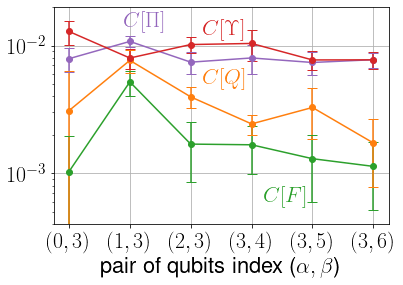

In [ ]:
qubits_order = [  2, 0, 3, 4, 1, 5 ]
plt.errorbar( x=range(6), y=F[qubits_order,0], yerr=DF[qubits_order,0], fmt='-o', capsize=5, color='tab:green' )
plt.errorbar( x=range(6), y=F[qubits_order,1], yerr=DF[qubits_order,1], fmt='-o', capsize=5, color='tab:orange' )
plt.errorbar( x=range(6), y=F[qubits_order,2], yerr=DF[qubits_order,2], fmt='-o', capsize=5, color='tab:purple' )
plt.errorbar( x=range(6), y=F[qubits_order,3], yerr=DF[qubits_order,3], fmt='-o', capsize=5, color='tab:red' )
plt.yscale('log')
plt.ylim(bottom=4e-4)
plt.xticks( range(6), labels=[ '$(0,3)$', '$(1,3)$', '$(2,3)$', '$(3,4)$', '$(3,5)$', '$(3,6)$' ])
plt.grid()
plt.text( 3.2, 6e-4, '$C[F]$', color='tab:green' )
plt.text( 2.2, 5e-3, '$C[Q]$', color='tab:orange' )
plt.text( 2.2, 1.2e-2, '$C[\\Upsilon]$', color='tab:red' )
plt.text( 0.9, 1.4e-2, '$C[\\Pi]$', color='tab:purple' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_distance_3.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_distance_3.svg', bbox_inches='tight', transparent=True )
plt.savefig('correlations_distance_3.pdf', bbox_inches='tight', transparent=True )